## Projet Taux de Conversion

Dans ce projet il est question de construire un modèle qui prédit le taux de conversion des clients sur un site web et faire des recommandations à une équipe marketing pour pouvoir augmenter le revenu.

#### Importation des librairies qui seront utiles pour le traitement des données

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#### Chargement du fichier csv contenant les données dans un dataframe

In [26]:
df = pd.read_csv("conversion_data.csv")

In [27]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


#### Exploration du jeu de données

In [28]:
df.isna().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

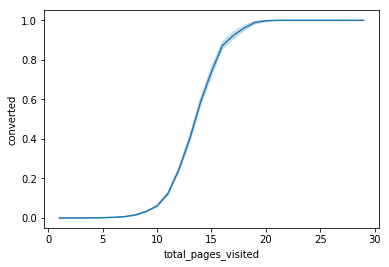

In [30]:
sns.lineplot(x="total_pages_visited", y="converted", data=df)

- La variable explicative _total_pages_visited_ a une relation de type sigmoide avec la variable cible _converted_

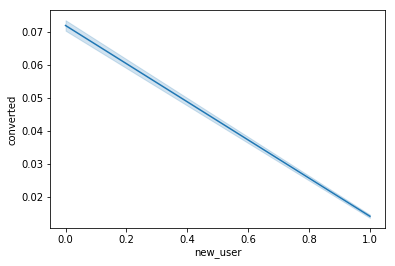

In [31]:
sns.lineplot(x="new_user", y="converted", data=df)

- La variable explicative _new_user_ a une relation linéaire avec la variable cible _converted_

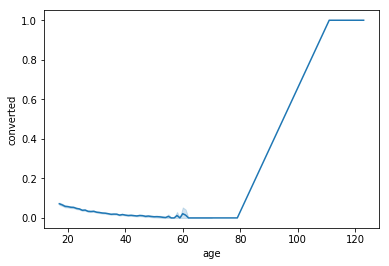

In [32]:
sns.lineplot(x="age", y="converted", data=df)

- La variable explicative _age_ semble avoir une relation de type sigmoide avec la variable cible _converted_
- Toutefois, la valeur d'age = 120 semble abberrante, on va donc s'intérésser à ce qu'il se passe avec la varibale age

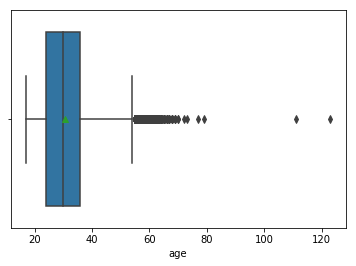

In [33]:
sns.boxplot(x="age", data=df, showmeans=True)

- Seuls deux points se trouvent au delà de 80 ans

In [36]:
df1 = df.query("age<=80")

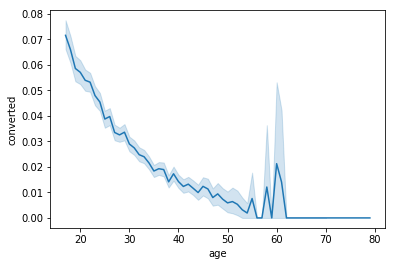

In [37]:
sns.lineplot(x="age", y="converted", data=df1)

### Quelques informations à propos du jeu de données

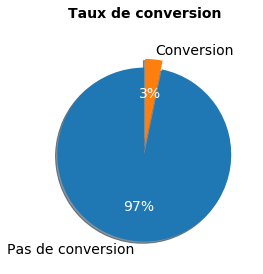

In [38]:
fig1_data = df1.converted.value_counts()/df1.converted.value_counts().sum()
fig1_data = fig1_data.rename(index={1: 'Conversion', 0: 'Pas de conversion'})

labels = [fig1_data.index[item] for item in range(0, len(fig1_data.index))]
explode = (0.0,0.1)

fig, ax = plt.subplots()
_, texts, autotexts = ax.pie(fig1_data, autopct='%0.0f%%', shadow=True, startangle=90, explode=explode, labels=labels, radius=1.0)
#fig.legend(fig_conversion.index, loc="center left")

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size('14')

for text in texts:
    text.set_size('14')

fig.legend(fig_data.index, loc="center left")
   
ax.set_title("Taux de conversion", y=1.1, fontsize = 14, fontweight='bold')
plt.show()

- Taux de conversion très faible (3%)

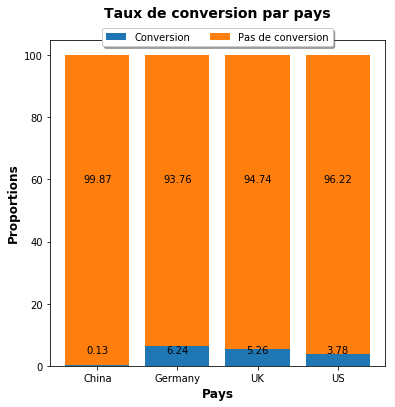

In [46]:
conv = df1.country[df1.converted == 1].value_counts()/df1.country.value_counts()
conv.sort_index(inplace=True)
prop_conv = [item*100 for item in conv]
prop_Noconv = (np.full((len(conv)), 100) - prop_conv)
legend = conv.index

f, ax = plt.subplots(figsize=(6,6))

ax.bar(legend, prop_conv, label="Conversion")
ax.bar(legend, prop_Noconv, bottom=prop_conv, label="Pas de conversion")

ax.text(legend[0], 60, np.round(prop_Noconv[0],2), ha="center", va="center")
ax.text(legend[0], 5, np.round(prop_conv[0],2), ha="center", va="center")

ax.text(legend[1], 60, np.round(prop_Noconv[1],2), ha="center", va="center")
ax.text(legend[1], 5, np.round(prop_conv[1],2),ha="center", va="center")

ax.text(legend[2], 60, np.round(prop_Noconv[2],2), ha="center", va="center")
ax.text(legend[2], 5, np.round(prop_conv[2],2),ha="center", va="center")

ax.text(legend[3], 60, np.round(prop_Noconv[3],2), ha="center", va="center")
ax.text(legend[3], 5, np.round(prop_conv[3],2),ha="center", va="center")

plt.ylabel('Proportions', fontsize=12, fontweight='bold')
plt.xlabel('Pays', fontsize = 12, fontweight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow=True)

ax.set_title("Taux de conversion par pays", y=1.05, fontsize = 14, fontweight='bold')
plt.show()

- Le taux de conversion le plus bas est obtenu en Chine
- L'Allemagne présente le meilleur taux
- Les US et UK ont des valeurs intermediares entre les deux premières citées
- Il serait important de savoir pourquoi on un taux aussi bas de manière générale, et particulièrement en Chine et pas dans les autres pays
- Il serait donc judicieux de construire un modèle de prédiction pour chaque pays

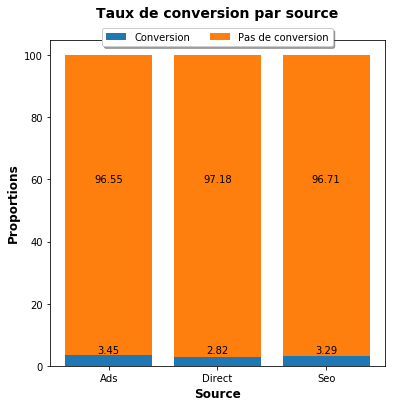

In [50]:
conv2 = df1.source[df1.converted == 1].value_counts()/df1.source.value_counts()
conv2.sort_index(inplace=True)
prop_conv2 = [item*100 for item in conv2]
prop_Noconv2 = (np.full((len(conv2)), 100) - prop_conv2)
legend = conv2.index

f, ax = plt.subplots(figsize=(6,6))

ax.bar(legend, prop_conv2, label="Conversion")
ax.bar(legend, prop_Noconv2, bottom=prop_conv2, label="Pas de conversion")

ax.text(legend[0], 60, np.round(prop_Noconv2[0],2), ha="center", va="center")
ax.text(legend[0], 5, np.round(prop_conv2[0],2), ha="center", va="center")

ax.text(legend[1], 60, np.round(prop_Noconv2[1],2), ha="center", va="center")
ax.text(legend[1], 5, np.round(prop_conv2[1],2),ha="center", va="center")

ax.text(legend[2], 60, np.round(prop_Noconv2[2],2), ha="center", va="center")
ax.text(legend[2], 5, np.round(prop_conv2[2],2),ha="center", va="center")

plt.ylabel('Proportions', fontsize=12, fontweight='bold')
plt.xlabel('Source', fontsize = 12, fontweight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow=True)

ax.set_title("Taux de conversion par source", y=1.05, fontsize = 14, fontweight='bold')
plt.show()

- le taux de conversion varie très peu en fontion de du canal par lequel ils arrivent sur le site web

In [52]:
df1["age1"] = df1.age.apply(lambda x: "Moins de 30" if x<=30 else 
                                      "Moins de 45" if 30<x<=45 else 
                                      "plus 45")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


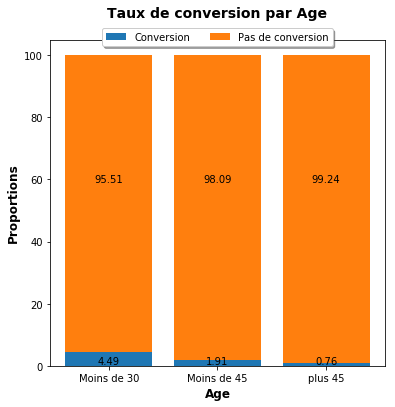

In [53]:
conv3 = df1.age1[df1.converted == 1].value_counts()/df1.age1.value_counts()
conv3.sort_index(inplace=True)
prop_conv3 = [item*100 for item in conv3]
prop_Noconv3 = (np.full((len(conv3)), 100) - prop_conv3)
legend = conv3.index

f, ax = plt.subplots(figsize=(6,6))

ax.bar(legend, prop_conv3, label="Conversion")
ax.bar(legend, prop_Noconv3, bottom=prop_conv3, label="Pas de conversion")

ax.text(legend[0], 60, np.round(prop_Noconv3[0],2), ha="center", va="center")
ax.text(legend[0], 1.5, np.round(prop_conv3[0],2), ha="center", va="center")

ax.text(legend[1], 60, np.round(prop_Noconv3[1],2), ha="center", va="center")
ax.text(legend[1], 1.5, np.round(prop_conv3[1],2),ha="center", va="center")

ax.text(legend[2], 60, np.round(prop_Noconv3[2],2), ha="center", va="center")
ax.text(legend[2], 1.5, np.round(prop_conv3[2],2),ha="center", va="center")

plt.ylabel('Proportions', fontsize=12, fontweight='bold')
plt.xlabel('Age', fontsize = 12, fontweight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow=True)

ax.set_title("Taux de conversion par Age", y=1.05, fontsize = 14, fontweight='bold')
plt.show()

- Le taux de conversion le plus élevé est observé chez les moins de 30 ans

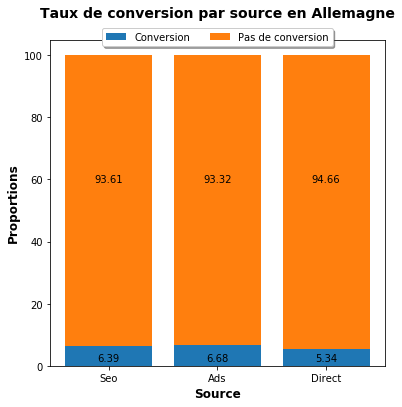

In [54]:
Ger_data = df1[df1.country == "Germany"]

conv_Ger = Ger_data.source[Ger_data.converted == 1].value_counts()/Ger_data.source.value_counts()
prop_conv_Ger = [item*100 for item in conv_Ger]
prop_Noconv_Ger = (np.full((len(conv_Ger)), 100) - prop_conv_Ger)
legend = conv_Ger.index

f, ax = plt.subplots(figsize=(6,6))

ax.bar(legend, prop_conv_Ger, label="Conversion")
ax.bar(legend, prop_Noconv_Ger, bottom=prop_conv_Ger, label="Pas de conversion")

ax.text(legend[0], 60, np.round(prop_Noconv_Ger[0],2), ha="center", va="center")
ax.text(legend[0], 2.5, np.round(prop_conv_Ger[0],2), ha="center", va="center")

ax.text(legend[1], 60, np.round(prop_Noconv_Ger[1],2), ha="center", va="center")
ax.text(legend[1], 2.5, np.round(prop_conv_Ger[1],2),ha="center", va="center")

ax.text(legend[2], 60, np.round(prop_Noconv_Ger[2],2), ha="center", va="center")
ax.text(legend[2], 2.5, np.round(prop_conv_Ger[2],2),ha="center", va="center")

plt.ylabel('Proportions', fontsize=12, fontweight='bold')
plt.xlabel('Source', fontsize = 12, fontweight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow=True)

ax.set_title("Taux de conversion par source en Allemagne", y=1.05, fontsize = 14, fontweight='bold')
plt.show()

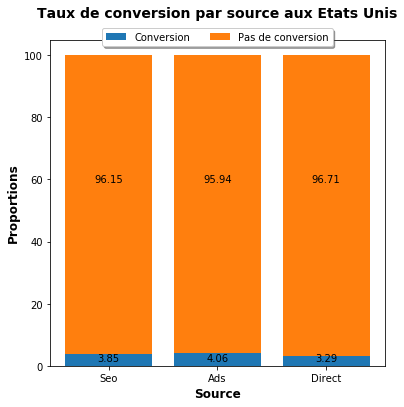

In [55]:
US_data = df1[df1.country == "US"]

conv_US = US_data.source[US_data.converted == 1].value_counts()/US_data.source.value_counts()
prop_conv_US = [item*100 for item in conv_US]
prop_Noconv_US = (np.full((len(conv_US)), 100) - prop_conv_US)
legend = conv_US.index

f, ax = plt.subplots(figsize=(6,6))

ax.bar(legend, prop_conv_US, label="Conversion")
ax.bar(legend, prop_Noconv_US, bottom=prop_conv_US, label="Pas de conversion")

ax.text(legend[0], 60, np.round(prop_Noconv_US[0],2), ha="center", va="center")
ax.text(legend[0], 2.5, np.round(prop_conv_US[0],2), ha="center", va="center")

ax.text(legend[1], 60, np.round(prop_Noconv_US[1],2), ha="center", va="center")
ax.text(legend[1], 2.5, np.round(prop_conv_US[1],2),ha="center", va="center")

ax.text(legend[2], 60, np.round(prop_Noconv_US[2],2), ha="center", va="center")
ax.text(legend[2], 2.5, np.round(prop_conv_US[2],2),ha="center", va="center")

plt.ylabel('Proportions', fontsize=12, fontweight='bold')
plt.xlabel('Source', fontsize = 12, fontweight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow=True)

ax.set_title("Taux de conversion par source aux Etats Unis", y=1.05, fontsize = 14, fontweight='bold')
plt.show()

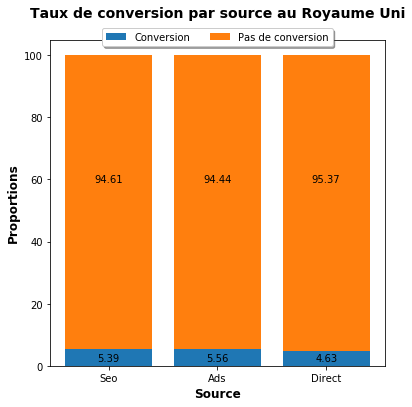

In [56]:
UK_data = df1[df1.country == "UK"]

conv_UK = UK_data.source[UK_data.converted == 1].value_counts()/UK_data.source.value_counts()
prop_conv_UK = [item*100 for item in conv_UK]
prop_Noconv_UK = (np.full((len(conv_UK)), 100) - prop_conv_UK)
legend = conv_UK.index

f, ax = plt.subplots(figsize=(6,6))

ax.bar(legend, prop_conv_UK, label="Conversion")
ax.bar(legend, prop_Noconv_UK, bottom=prop_conv_UK, label="Pas de conversion")

ax.text(legend[0], 60, np.round(prop_Noconv_UK[0],2), ha="center", va="center")
ax.text(legend[0], 2.5, np.round(prop_conv_UK[0],2), ha="center", va="center")

ax.text(legend[1], 60, np.round(prop_Noconv_UK[1],2), ha="center", va="center")
ax.text(legend[1], 2.5, np.round(prop_conv_UK[1],2),ha="center", va="center")

ax.text(legend[2], 60, np.round(prop_Noconv_UK[2],2), ha="center", va="center")
ax.text(legend[2], 2.5, np.round(prop_conv_UK[2],2),ha="center", va="center")

plt.ylabel('Proportions', fontsize=12, fontweight='bold')
plt.xlabel('Source', fontsize = 12, fontweight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow=True)

ax.set_title("Taux de conversion par source au Royaume Uni", y=1.05, fontsize = 14, fontweight='bold')
plt.show()

- Pour les pays présentant les taux de conversion les plus elévés, le taux ne dépend pas du canal par lequel les utilisateurs arrivent sur le site web

### Construction d'un modèle de prédiction

In [57]:
df1.head()

,country,age,new_user,source,total_pages_visited,converted,age1
0,UK,25,1,Ads,1,0,Moins de 30
1,US,23,1,Seo,5,0,Moins de 30
2,US,28,1,Seo,4,0,Moins de 30
3,China,39,1,Seo,5,0,Moins de 45
4,US,30,1,Seo,6,0,Moins de 30


#### On sépare les variables explicatives et la variable cible

In [60]:
X = df1.loc[:, ['country', 'age1', 'new_user', 'total_pages_visited', 'source']]
Y = df1.loc[:, 'converted']

In [61]:
X = pd.get_dummies(X, drop_first=True)

### Feature selection : calcul des chi2 et p-value de nos variables explicatives

- On recherche les variables explicatives qui sont liées à la variable cible (hypothèse d'indépendance de deux variables)

In [62]:
from sklearn.feature_selection import chi2

In [63]:
feature_importance = chi2(X,Y)
feature_importance

(array([2.30802259e+03, 2.02677372e+05, 3.80880794e+02, 6.43466067e+02,
        1.75677270e+02, 7.31873681e+02, 2.97616526e+02, 3.86797846e+01,
        2.01277614e+00]),
 array([0.00000000e+000, 0.00000000e+000, 8.00200871e-085, 5.89011424e-142,
        4.25902331e-040, 3.50574256e-161, 1.08907298e-066, 4.99354137e-010,
        1.55979667e-001]))

In [64]:
features = X.columns

In [65]:
feature_rank = pd.DataFrame(columns=X.columns, index=['Chi2_score', 'p-value'], 
                            data=feature_importance).transpose().sort_values(['Chi2_score', 'p-value'], ascending=False)
feature_rank

,Chi2_score,p-value
total_pages_visited,202677.371688,0.000000e+00
new_user,2308.022594,0.000000e+00
age1_Moins de 45,731.873681,3.505743e-161
country_UK,643.466067,5.890114e-142
country_Germany,380.880794,8.002009e-85
age1_plus 45,297.616526,1.089073e-66
country_US,175.677270,4.259023e-40
source_Direct,38.679785,4.993541e-10
source_Seo,2.012776,1.559797e-01


- Toutes nos variables explicatives ont une p-value < 0.05 donc sont potentiellement utilisables dans le modèle.
- On va dans un premier temps utiliser les variables _total_pages_visited_ et _new_user_ pour construire un modèle de prédiction

In [417]:
X = df1.loc[:, ['new_user', 'total_pages_visited']]
X = pd.get_dummies(X, drop_first=True)

In [418]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

In [419]:
train_set = pd.concat([X_train, Y_train], axis=1)

In [420]:
train_set.head()

,new_user,total_pages_visited,converted
262615,1,9,0
235138,0,9,0
151586,1,7,0
285805,0,2,0
188665,1,4,0


In [421]:
nb_converted_0, nb_converted_1 = train_set.converted.value_counts()
nb_converted_0/(nb_converted_0+nb_converted_1), nb_converted_1/(nb_converted_0+nb_converted_1)

(0.9677495868879419, 0.032250413112058125)

- Les classes sont déséquilibrées dans la variable cible (97% de 0 et 3% de 1)
- On utilise une méthode pour les rééquilibrer (réduction du nombre de 0 ou augmentation du nombre de 1)
- Ici on va augmenter le nombre de 1 pour avoir un dataset composé de 80% de 0 et 20% de 1

In [422]:
train_set_0 = train_set[train_set.converted == 0]
train_set_1 = train_set[train_set.converted == 1]

In [423]:
len(X), len(X_train), len(X_test), len(train_set_0), len(train_set_1)

(316198, 252958, 63240, 244800, 8158)

In [424]:
nb_observations = int(len(X_train)*0.30) - len(train_set_1)
train_set_0_to_1 = train_set_0.sample(n=nb_observations, random_state=42)
new_train_set_0 = train_set_0[~train_set_0.isin(train_set_0_to_1)].dropna()

In [425]:
len(new_train_set_0), len(train_set_0_to_1)

(177071, 67729)

In [426]:
train_set_0_to_1.head()

,new_user,total_pages_visited,converted
84602,1,4,0
155841,1,7,0
287537,1,2,0
24101,1,4,0
176817,0,4,0


In [427]:
train_set_0_to_1.replace({'converted': 0}, 1, inplace=True)

In [428]:
train_set_0_to_1.head()

,new_user,total_pages_visited,converted
84602,1,4,1
155841,1,7,1
287537,1,2,1
24101,1,4,1
176817,0,4,1


In [429]:
train_set_1 = pd.concat([train_set_1 , train_set_0_to_1], axis=0)

In [430]:
len(X), len(X_train), len(X_test), len(new_train_set_0), len(train_set_1)

(316198, 252958, 63240, 177071, 75887)

In [431]:
dataset_new = pd.concat([new_train_set_0 , train_set_1], axis=0)

In [432]:
nb_converted_0, nb_converted_1 = dataset_new.converted.value_counts()
nb_converted_0/(nb_converted_0+nb_converted_1), nb_converted_1/(nb_converted_0+nb_converted_1)

(0.7000015812901746, 0.29999841870982535)

In [433]:
dataset_new.converted = dataset_new.converted.astype('int64')
dataset_new.head()

,new_user,total_pages_visited,converted
262615,1.0,9.0,0
235138,0.0,9.0,0
151586,1.0,7.0,0
285805,0.0,2.0,0
127317,0.0,4.0,0


In [434]:
X_train = dataset_new.drop(columns=['converted'])
Y_train = dataset_new.converted

- On normalise les valeurs numériques du jeu de données

In [435]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [459]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [460]:
from sklearn.metrics import confusion_matrix, classification_report
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

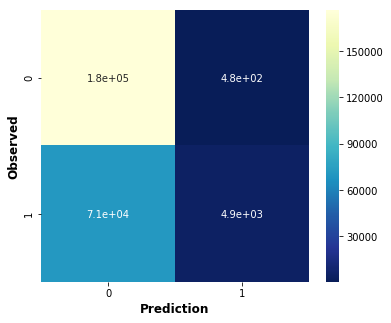

In [461]:
train_matrix = confusion_matrix(Y_train, Y_train_pred)

f, ax = plt.subplots(figsize=(6,5))

sns.heatmap(train_matrix, annot=True, ax=ax, cmap="YlGnBu_r")

plt.xlabel('Prediction', fontsize=12, fontweight='bold')
plt.ylabel('Observed', fontsize=12, fontweight='bold')
plt.show()

In [462]:
classifier.score(X_train, Y_train)

0.7173799603096166

In [463]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83    177071
           1       0.91      0.06      0.12     75887

   micro avg       0.72      0.72      0.72    252958
   macro avg       0.81      0.53      0.48    252958
weighted avg       0.77      0.72      0.62    252958



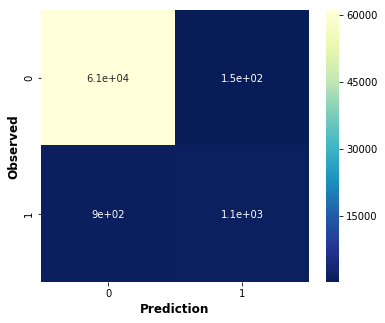

In [464]:
test_matrix = confusion_matrix(Y_test, Y_test_pred)

f, ax = plt.subplots(figsize=(6,5))

sns.heatmap(test_matrix, annot=True, ax=ax, cmap="YlGnBu_r")

plt.xlabel('Prediction', fontsize=12, fontweight='bold')
plt.ylabel('Observed', fontsize=12, fontweight='bold')
plt.show()

In [465]:
classifier.score(X_test, Y_test)

0.983349146110057

In [466]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61200
           1       0.88      0.56      0.68      2040

   micro avg       0.98      0.98      0.98     63240
   macro avg       0.93      0.78      0.84     63240
weighted avg       0.98      0.98      0.98     63240



In [467]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

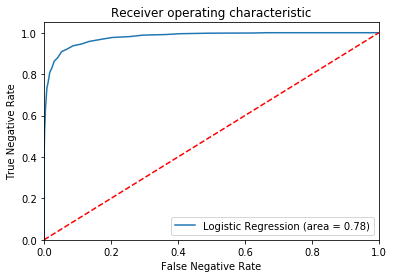

In [468]:
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Negative Rate')
plt.ylabel('True Negative Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

- Le modèle généralise bien, les prédictions sont meilleures sur le test
- Le modèle prédit correctement la conversion dans 88% des cas et la non conversion dans 99% cas (précision)
- Toutefois le modèle n'arrive à dectecter que 56% des conversions (recall)
- Optimiser les performances:
    - Faire un modèle par pays
    - Faire un modèle par type de user (new/old)

- Recommandations à l'équipe marketing
    - s'intéresser aux habitudes des clients sur le site web et adapter le contenu du site en fontion
    - Faire une étude par pays, par tranche d'age, par source